In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Load the dataset

file_path = r"C:\Users\Administrator\BXL-Bouman-8\challenge_immo_analysis\data\normalized_dataset.csv"
file_cp_region_path = r"C:\Users\Administrator\BXL-Bouman-8\challenge_immo_analysis\data\cp_region.csv"
data = pd.read_csv(file_path)
cp_region_data = pd.read_csv(file_cp_region_path)

data = pd.merge(data, cp_region_data[['Zip Code', 'region_name_fr']], on='Zip Code', how='left')

In [2]:
# Filter data by region
data_belgium = data.copy()
data_wallonia = data[data['region_name_fr'] == 'Région wallonne']
data_flanders = data[data['region_name_fr'] == 'Région flamande']
data_brussels = data[data['region_name_fr'] == 'Région de Bruxelles-Capitale']



In [5]:
# colors
colors = {
    "Belgium": "#fd8d3c",  
    "Wallonia": "#fecc5c",
    "Flanders": "#f03b20",
    "Brussels": "#e31a1c",
}

# Set Seaborn theme for professional styling
sns.set_theme(style="whitegrid", font="Arial", rc={"axes.titlesize": 14, "axes.labelsize": 12})

# Function to format axes with commas
def format_ticks(x, _):
    return f'{int(x):,}'

# Function to plot histograms with density curves
def plot_seaborn_histogram_with_kde(data, column, title, color, ax):
    min_value = data[column].min()
    max_value = data[column].max()
    avg_value = data[column].mean()
    median_value = data[column].median()
        
    # Plot histogram with density curve
    sns.histplot(data[column], kde=True, bins=20, color=color, ax=ax, alpha=0.7, line_kws={"linewidth": 2})
    
    # Add average, median, min, and max lines
    ax.axvline(avg_value, color='red', linestyle='--', linewidth=1.5, label=f'Avg: {avg_value:,.2f}')
    ax.axvline(median_value, color='green', linestyle='--', linewidth=1.5, label=f'Median: {median_value:,.2f}')
    ax.axvline(min_value, color='blue', linestyle='-.', linewidth=1.5, label=f'Min: {min_value:,.2f}')
    ax.axvline(max_value, color='purple', linestyle='-.', linewidth=1.5, label=f'Max: {max_value:,.2f}')
    
    # Customize the plot's appearance
    ax.set_title(title, weight='bold', color="#333333")
    ax.set_xlabel(f"{column} (€)", fontsize=12, weight='bold')
    ax.set_ylabel("Number of properties", fontsize=12, weight='bold')
    ax.legend(fontsize=10)
    ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
    
    # Format x-axis ticks with commas
    ax.xaxis.set_major_formatter(FuncFormatter(format_ticks))

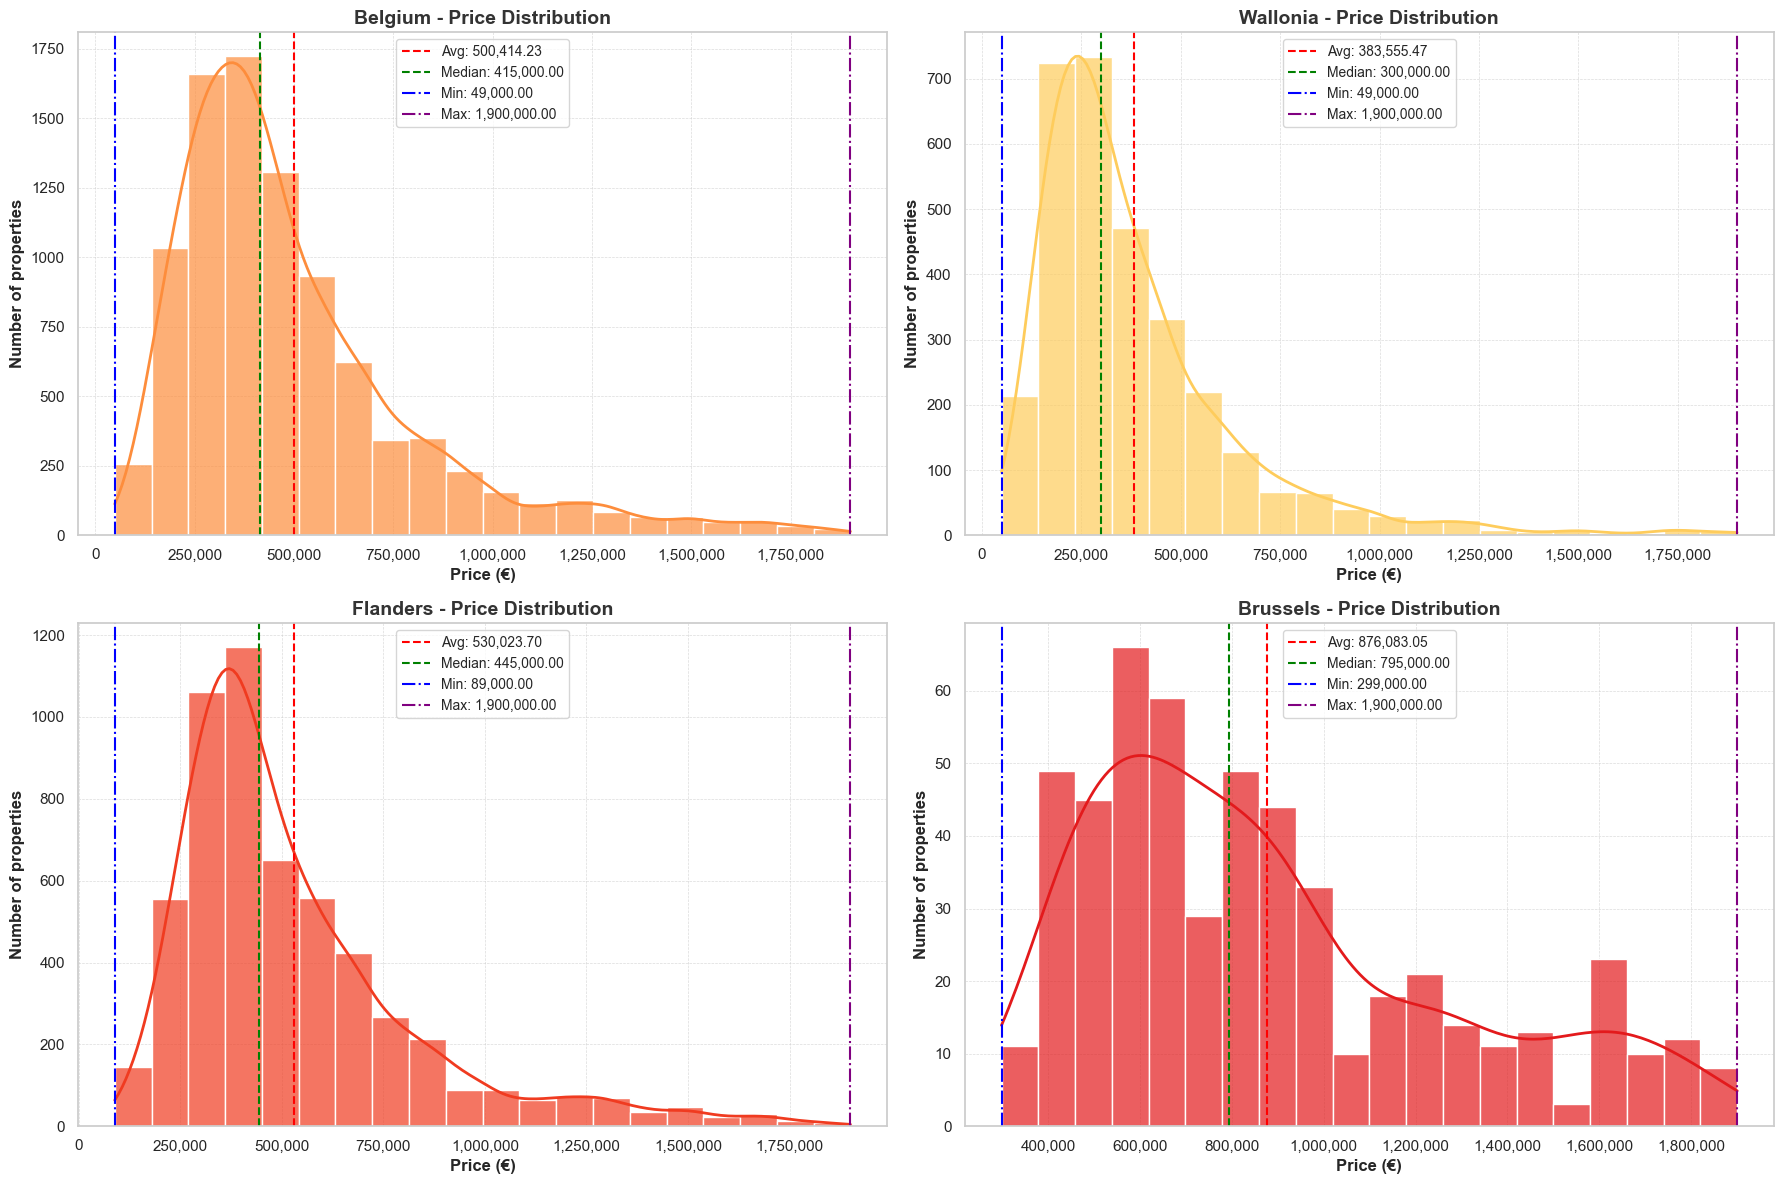

In [6]:
# Plot Price Distribution with Density Curves
fig, axes = plt.subplots(2, 2, figsize=(18, 12), tight_layout=True)
plot_seaborn_histogram_with_kde(data_belgium, 'Price', "Belgium - Price Distribution", colors["Belgium"], axes[0, 0])
plot_seaborn_histogram_with_kde(data_wallonia, 'Price', "Wallonia - Price Distribution", colors["Wallonia"], axes[0, 1])
plot_seaborn_histogram_with_kde(data_flanders, 'Price', "Flanders - Price Distribution", colors["Flanders"], axes[1, 0])
plot_seaborn_histogram_with_kde(data_brussels, 'Price', "Brussels - Price Distribution", colors["Brussels"], axes[1, 1])
plt.show()

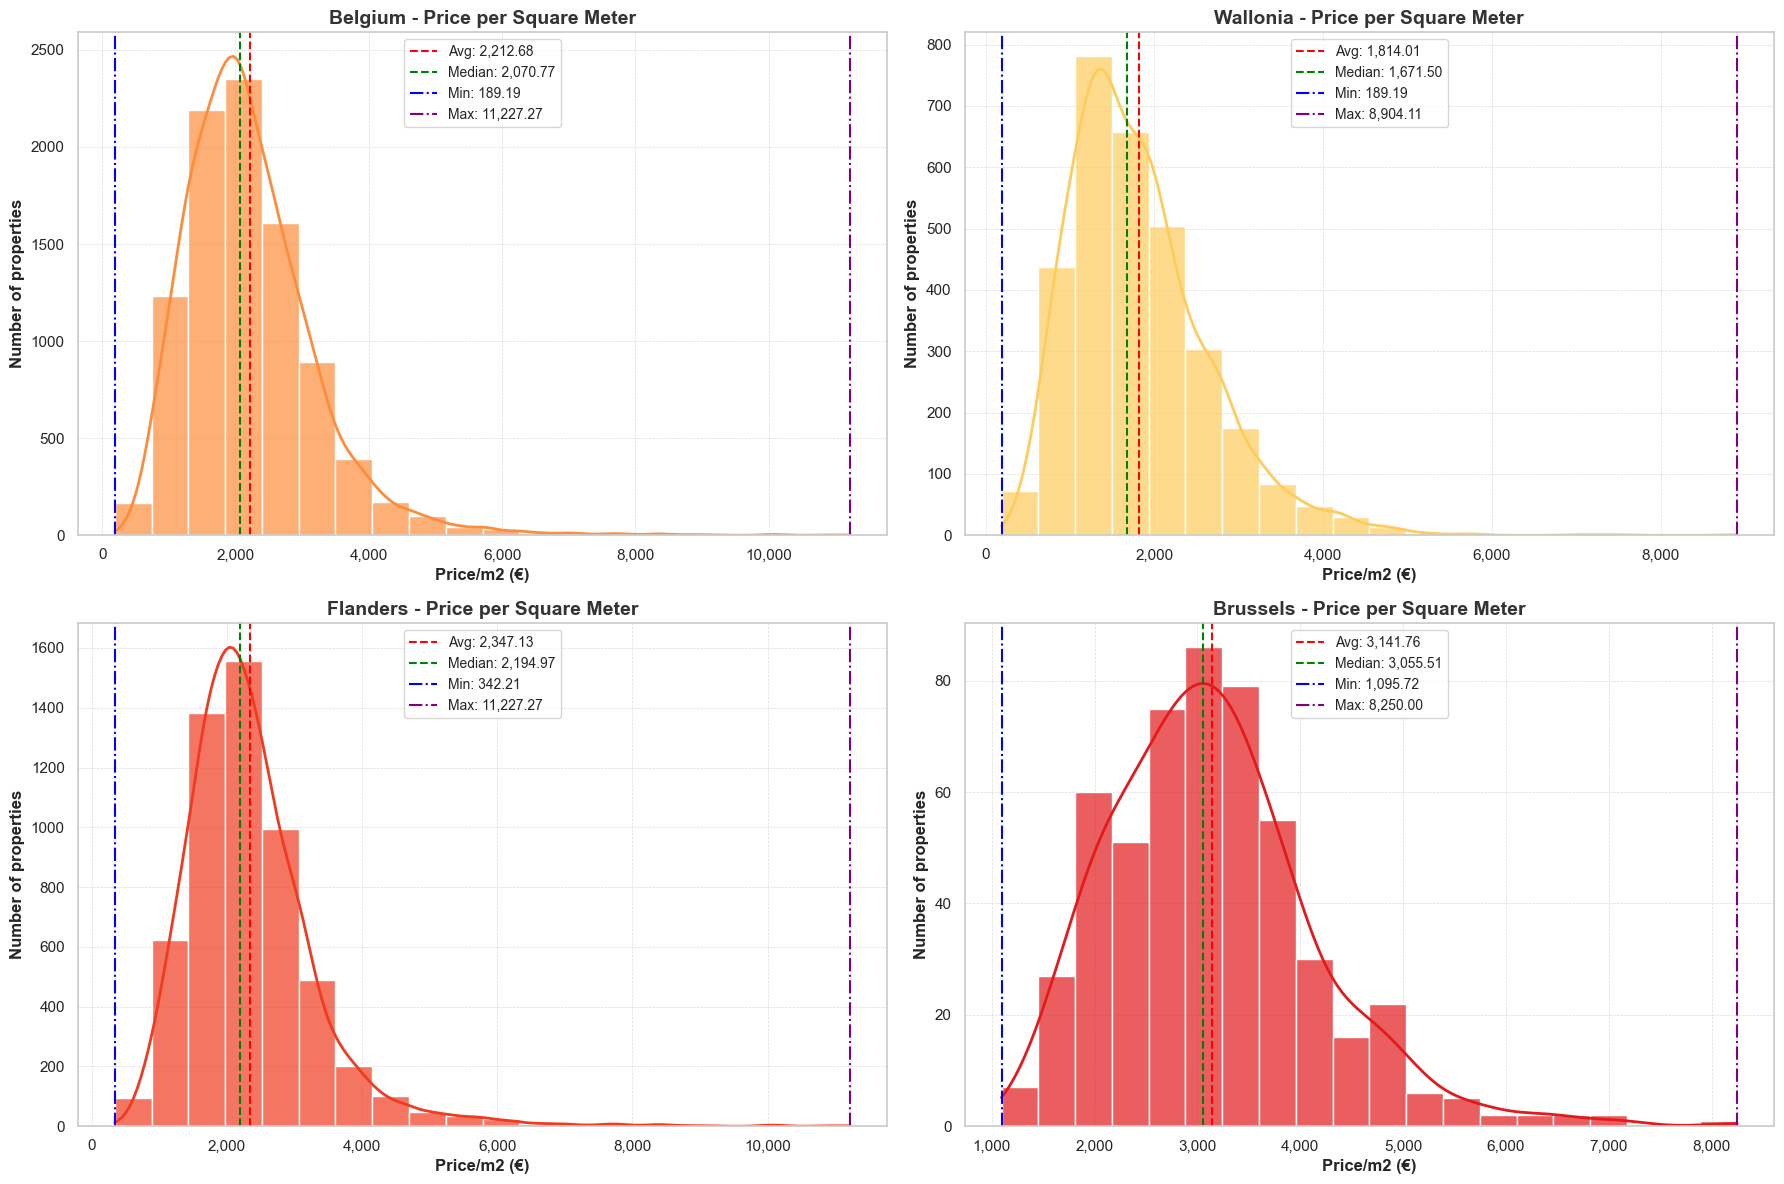

In [7]:
# Plot Price per Square Meter Distribution with Density Curves
fig, axes = plt.subplots(2, 2, figsize=(18, 12), tight_layout=True)
plot_seaborn_histogram_with_kde(data_belgium, 'Price/m2', "Belgium - Price per Square Meter", colors["Belgium"], axes[0, 0])
plot_seaborn_histogram_with_kde(data_wallonia, 'Price/m2', "Wallonia - Price per Square Meter", colors["Wallonia"], axes[0, 1])
plot_seaborn_histogram_with_kde(data_flanders, 'Price/m2', "Flanders - Price per Square Meter", colors["Flanders"], axes[1, 0])
plot_seaborn_histogram_with_kde(data_brussels, 'Price/m2', "Brussels - Price per Square Meter", colors["Brussels"], axes[1, 1])
plt.show()

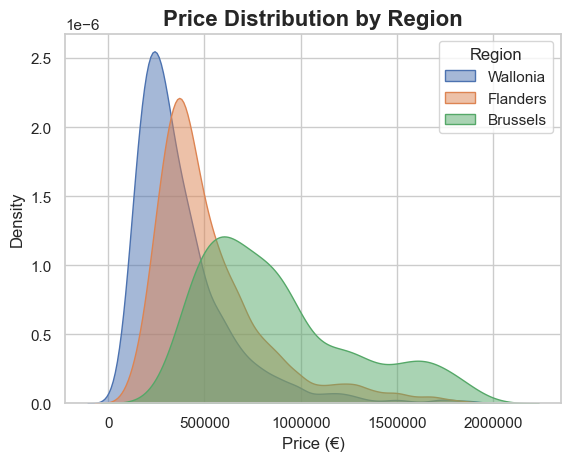

In [9]:
# Define regions based on Zip Code
regions = {
    "Wallonia": data[data['region_name_fr'] == 'Région wallonne'],
    "Flanders": data[data['region_name_fr'] == 'Région flamande'],
    "Brussels": data[data['region_name_fr'] == 'Région de Bruxelles-Capitale'],
}

for region_name, region_data in regions.items():
    sns.kdeplot(region_data["Price"], label=region_name, fill=True, alpha=0.5)

plt.title("Price Distribution by Region", fontsize=16, weight='bold')
plt.xlabel("Price (€)", fontsize=12)
plt.ylabel("Density", fontsize=12)
#plt.ticklabel_format(style='plain', axis= 'both')
plt.ticklabel_format(style='plain', axis= 'x')
plt.legend(title="Region")
plt.show()



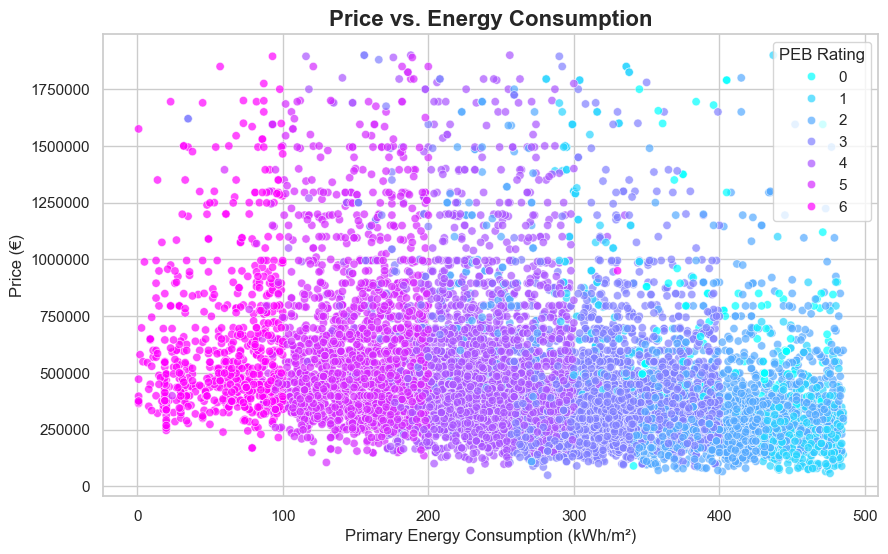

In [35]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x="Primary Energy Consumption (kWh/m2)", y="Price", hue="PEB", palette="cool", alpha=0.7)
plt.title("Price vs. Energy Consumption", fontsize=16, weight='bold')
plt.xlabel("Primary Energy Consumption (kWh/m²)", fontsize=12)
plt.ylabel("Price (€)", fontsize=12)
plt.ticklabel_format(style='plain', axis='y')  # Remove scientific notation
plt.legend(title="PEB Rating")
plt.show()




In [11]:
# Plotting the Density Plot
plt.figure(figsize=(12, 8))

for idx, region in enumerate(regions):
    region_data = data[data["region_name_fr"] == region]["Price"]
    density_plot = sns.kdeplot(
        region_data, 
        color=colors[idx], 
        fill=True, 
        alpha=0.6, 
        label=region
    )
    # Adjust KDE curve line width
    if density_plot.lines:
        density_plot.lines[-1].set_linewidth(2)

# Titles and Labels
plt.title("Price Distribution by Region (Density)", fontsize=16, weight="bold")
plt.xlabel("Price (€)", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.ticklabel_format(style="plain", axis="both")  # Remove scientific notation
plt.legend(title="Region", fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.6)

# Display the plot
plt.tight_layout()
plt.show()



KeyError: 0

<Figure size 1200x800 with 0 Axes>